# 演習5
試行を通じての分散Σiの学習をシミュレートします。簡単のために、式(59)–(60)で説明されたネットワークのみをシミュレートし、変数φが一定であると仮定します。各試行で平均5、分散2の正規分布から入力φiを生成し、gi(φi+1) = 5と設定します（これにより、上位レベルがφiの平均を正確に予測します）。ネットワークを20時間単位でシミュレートし、その後、学習率α = 0.01で重みΣiを更新します。1000試行をシミュレートし、試行を通じてΣiがどのように変化するかをプロットします。

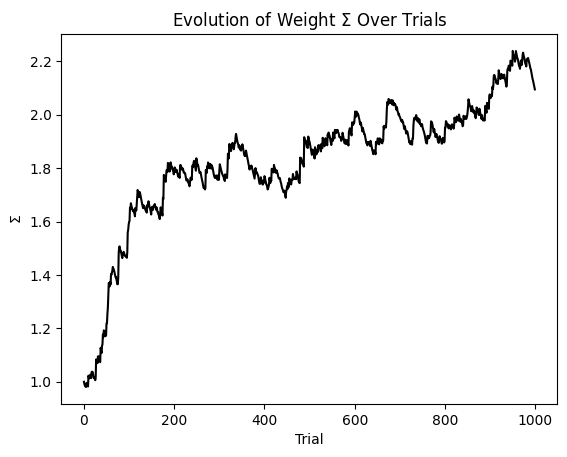

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean_phi = 5  # mean of input from the current level
Sigma_phi = 2  # variance of input from the current level
phi_above = 5  # input from the level above
DT = 0.01  # integration step
MAXT = 20  # maximum time considered
TRIALS = 1000  # number of simulated trials
LRATE = 0.01  # learning rate
Sigma = np.zeros(TRIALS)  # initializing the value of weight
Sigma[0] = 1  # starting value of Sigma

for trial in range(1, TRIALS):
    error = np.zeros(int(MAXT/DT))
    e = np.zeros(int(MAXT/DT))  # initializing the interneuron
    phi = mean_phi + np.sqrt(Sigma_phi) * np.random.randn()
    for i in range(1, int(MAXT/DT)):
        # [59]
        error[i] = error[i-1] + DT * (phi - phi_above - e[i-1])
        # [60]
        e[i] = e[i-1] + DT * (Sigma[trial - 1] * error[i-1] - e[i-1])
    # [61]
    Sigma[trial] = Sigma[trial - 1] + LRATE * (error[-1] * e[-1] - 1)

# Plotting
plt.plot(Sigma, 'k')
plt.xlabel('Trial')
plt.ylabel(r'$\Sigma$')
plt.title('Evolution of Weight $\Sigma$ Over Trials')
plt.show()